In [1]:
using LinearAlgebra
#using NLsolve
using OrdinaryDiffEq
using Plots
#using Symbolics

In [2]:

debug = false;
const D = 4
include("flux-and-jacobian-functions.jl")
include("inversion.jl")
include("flux-functions.jl")
include("initial-data.jl")
include("choques_utils.jl")
include("auxfunctions.jl")
include("parameters_creator.jl")#Load important packages

parameters_creator (generic function with 1 method)

## Christoffel Symbols

We have the equations

\begin{equation}
    \begin{matrix}
        \nabla_{a}T^{ab}&=&0\\
        \nabla_{a}A^{abc}&=&I^{bc}
    \end{matrix}
\end{equation}

We can rewrite this as

\begin{equation}
    \begin{matrix}
        \partial_{a}T^{ab} + \Gamma^{b}_{ad}T^{ad} + \Gamma^{a}_{ad}T^{db}&=&0\\
        \partial_{a}A^{abc} + \Gamma^{a}_{ad}A^{dbc} + \Gamma^{b}_{ad}A^{adc} + \Gamma^{c}_{ad}A^{abd} &=&I^{bc}
    \end{matrix}
\end{equation}

For example

\begin{equation}
    \begin{matrix}
        \partial_{t}T^{t0} + \Gamma^{0}_{td}T^{td} + \Gamma^{t}_{td}T^{d0} =\\ - (\partial_{x}T^{x0} + \Gamma^{0}_{xd}T^{xd} + \Gamma^{x}_{xd}T^{d0} + \partial_{z}T^{z0} + \Gamma^{0}_{zd}T^{zd} + \Gamma^{z}_{zd}T^{d0})
    \end{matrix}
\end{equation}



In [4]:
#initial_data_type = :constant_mu
initial_data_type = :chichon_3D
#Grid parameters
N_out = 40
M_out = 40
O_out = 40
const N_Fields_out = 14
Lx_out = 20.0
Ly_out = 20.0
Lz_out = 20.0

lengthpars_out = (Lx_out, Ly_out, Lz_out, N_out, M_out, O_out, N_Fields_out)

(20.0, 20.0, 20.0, 40, 40, 40, 14)

In [5]:
get_pos(N_out+3,N_out/2+4,N_out+3, lengthpars_out)

(10.0, 0.2564102564102573, 10.0)

In [6]:
#initial data vector
initial_data = ones(N_out+6,M_out+6, O_out+6,2*N_Fields_out);


C0_out = 1
C1_out = 10
C2_out = 100

χ_out = (0.0, 1.0)
C_out = (C0_out, C1_out, C2_out)

tol_out = 1e-15
iter_max_out = 10

Mass = 0.0
a = 0.0
println("hola")

par_inidat, par_source, par_flux, par_inv, par_ev = parameters_creator(χ_out, C_out, lengthpars_out, tol_out, iter_max_out, Mass, a)

gtable = par_inv[end];
Γtable = par_source[end];


hola
creating metric
metric created
creating christoffels
christoffels created
I am in parameters creator
hello!
I get here!


In [7]:
include("initial-data.jl")

create_initial_data (generic function with 1 method)

In [8]:
include("metric-creator.jl")
include("initial-data.jl")
println("Starting Dissipative Run...")
#initial_data_type = :constant_mu
dx = Lx_out/N_out
dt = dx*0.1

tf = 20
initial_data_type = :chichon_3D
create_initial_data(initial_data_type, initial_data, par_inidat)
println("initialized.")

Starting Dissipative Run...
Lx = 20.0, Ly = 20.0, Lz = 20.0
Initializing data...
closing initialization function...
initialized.


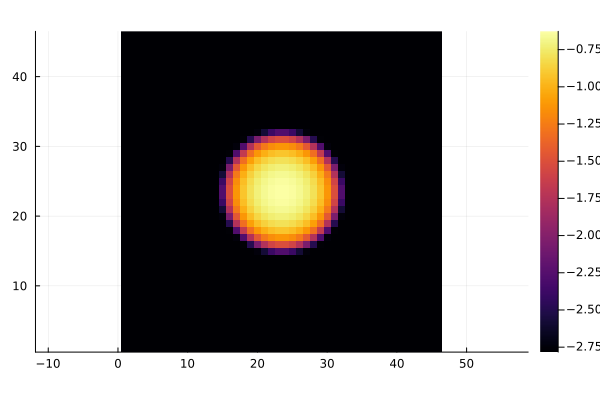

In [10]:
heatmap(initial_data[:,:,23,15], aspect_ratio=1)

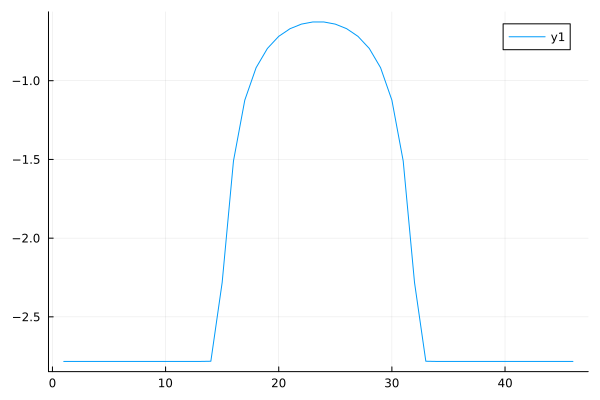

In [11]:
plot(initial_data[:,23,23,15])

In [12]:
include("flux-functions.jl")
include("choques_utils.jl")
include("inversion.jl")

c2abs! (generic function with 1 method)

In [13]:
du_test = copy(initial_data)
evolution!(du_test,initial_data,(par_inv, par_ev, lengthpars_out),0.2)

2725408-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
Fdummy = zeros(28);
u_dummy = rand(28);



In [15]:
Fx!(Fdummy, u_dummy, 4, 8, 9, par_flux)[12]

1.0696361818562554

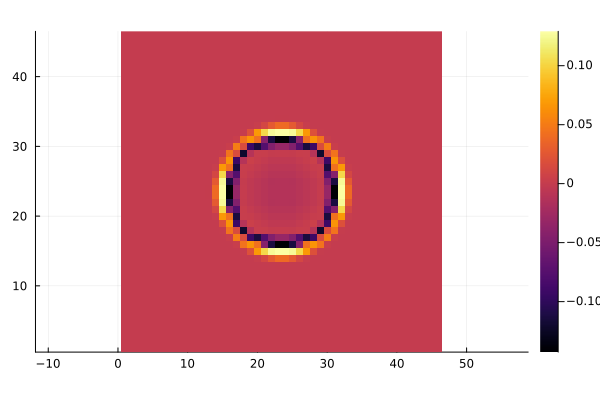

In [16]:
heatmap(du_test[23,:,:,1], aspectratio=1)

In [36]:
tf = 4.0
prob = ODEProblem(evolution!, initial_data, (0.0,tf), (par_inv, par_ev,lengthpars_out));
println("Starting to solve...")
dt = 0.01*dx
sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
println("solved")

Starting to solve...


SingularException: SingularException(1)

In [18]:
heatmap(sol.u[101][:,:,23,1], aspectratio=1)

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [19]:
anim = @animate for u in sol.u
    heatmap(u[:,:,23,1], clims = (0.0,0.5), aspectratio=1)
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [20]:
gif(anim)

UndefVarError: UndefVarError: `anim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [21]:
anim = @animate for u in sol.u
    plot(u[:,23,23,1], ylims = (0,0.5))
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [22]:
plt = plot()
intlist = []
for t in sol.t
    append!(intlist, sum(sol(t)[:,:,:,1]))
end
plot(sol.t, intlist, ylims = (9.9E3, 9.91E3))

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [23]:
sol.t

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [24]:
gif(anim)

UndefVarError: UndefVarError: `anim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [25]:
dx = Lx_out/N_out
dy = Ly_out/M_out

xlist = [-Lx_out/2 + dx*i for i in 1:N_out]
ylist = [dy*i for i in 1:M_out]

40-element Vector{Float64}:
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  ⋮
 16.0
 16.5
 17.0
 17.5
 18.0
 18.5
 19.0
 19.5
 20.0

In [26]:
anim = @animate for u in sol.u
    heatmap(xlist, ylist, u[4:end-3,4:end-3,1]./sqrtg[4:end-3,4:end-3], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("Energía")
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [27]:
gif(anim, "Test_energy.gif")

UndefVarError: UndefVarError: `anim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [28]:
anim2 = @animate for u in sol.u
    heatmap(xlist, ylist, u[4:end-3,4:end-3,16], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("\$v_2\$")
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [29]:
gif(anim2, "Test_v_r.gif")

UndefVarError: UndefVarError: `anim2` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [30]:
plt = heatmap(xlist, ylist, sol.u[end][4:end-3,4:end-3,1], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
title!("Energía")
savefig(plt, "T002D-2.png")

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [31]:
plt2 = heatmap(xlist, ylist, sol.u[end][4:end-3,4:end-3,5], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
title!("\$A_{000}\$")
savefig(plt2, "A0002D-2.png")

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [32]:
using JLD2

In [33]:


C0_out = 100
C1_out = 10
C2_out = 10

χ_out = (1.0, 1.0)
@save "test_solution-2.jld2" sol

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [34]:
ξ_ab = zeros(4,4)
ξᵃ = zeros(4)
lᵃ = zeros(4)
gᵃᵇ = Diagonal([-1,1,1,1])
ξᵃᵇ = copy(ξ_ab)
τᵃᵇ = copy(ξ_ab)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [35]:
k = 4;
νmap = zeros(N_out+6, M_out+6)

anim3 = @animate for u in sol.u
    for i in 1:N_out+6
        for j in 1:M_out+6
            ξ_a = @view u[i,j,15:18]
            ξ_ab_vec = @view u[i,j,19:end]


            ξ_ab_fun!(ξ_ab_vec, ξ_ab)

            #Vectors
            rise_index!(ξᵃ, gᵃᵇ, ξ_a)
            ξᵃᵇ_fun!(ξᵃᵇ, gᵃᵇ, ξ_ab)
            mul!(lᵃ, ξᵃᵇ, ξ_a)
            #Scalars
            μ = ξᵃ'ξ_a
            ν = lᵃ'ξ_a
            νmap[i,j] = ν
            #Tensors
            #τᵃᵇ_fun!(τᵃᵇ, μ, ν, ξᵃ, lᵃ, ξᵃᵇ, gᵃᵇ)
            

        end
    end
    heatmap(xlist, ylist, νmap[4:end-3,4:end-3], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("\$ ν \$")
end
gif(anim3)

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.